## Wine Quality using KNN Classifier

In [260]:
# Importing the required packages and libraries 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [261]:
# "read_csv" is a pandas function to read csv files from web or local drive:
wine_df = pd.read_csv('https://raw.githubusercontent.com/pramirezx/WineQuality/main/winequality-red.csv')

# checking the dataset by printing every 10 lines:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [262]:
# Creating the Feature Matrix for wine quality dataset:

# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']

# use the above list to select the features from the original DataFrame
X = wine_df[feature_cols]  

# print the first 5 rows
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [263]:
# checking the size of Feature Matix X:

print(X.shape)

(1599, 11)


In [264]:
# select a Series of labels (the last column) from the DataFrame
y = wine_df['quality'] # this is the original categorical labels (the latest revision of sklearn accepts non-numerical labels)

# checking the label vector by printing every 10 values
y[::10]

0       5
10      5
20      6
30      5
40      5
       ..
1550    5
1560    5
1570    6
1580    6
1590    6
Name: quality, Length: 160, dtype: int64

### KNN Classifier

In [290]:
# In the following line, "knn" is instantiated as an "object" of KNeighborsClassifier "class". 

k = 1
knn_wine = KNeighborsClassifier(n_neighbors=k) 

In [291]:
# We can use the method "fit" of the "object knn" along with training dataset and labels to train the model.

knn_wine.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

#### Evaluating the accuracy of KNN Classifier

In [304]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3) # We can fix the random_state for reproducibility!

In [305]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [306]:
# Training ONLY on the training set:

knn_wine.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [307]:
# Testing on the testing set:

y_predict = knn_wine.predict(X_test)

print(y_predict)

[5 5 6 6 6 5 6 5 6 5 5 5 5 5 6 5 6 6 7 5 5 5 6 5 5 7 5 6 6 6 5 6 6 6 5 5 6
 5 6 6 6 6 5 5 5 5 5 6 5 6 5 5 6 6 5 5 4 5 5 5 5 6 6 5 6 6 5 6 5 6 5 5 5 7
 6 5 5 6 6 6 7 6 5 6 5 5 5 5 5 5 6 6 6 5 5 6 5 5 5 7 5 6 7 6 7 5 5 5 7 7 6
 5 5 6 5 5 5 5 6 8 6 5 6 6 6 6 6 6 6 7 6 6 5 6 7 5 7 5 5 6 5 7 5 5 6 5 6 6
 6 5 7 6 6 5 7 5 6 5 5 6 6 6 7 5 5 6 5 6 6 4 6 6 6 6 6 6 5 5 5 7 7 6 5 6 5
 6 5 6 6 5 7 7 5 6 6 5 5 5 6 5 5 5 7 5 7 6 6 7 5 5 6 5 5 5 6 6 4 5 5 4 6 5
 6 5 6 6 6 5 5 5 8 5 5 5 5 6 6 7 6 6 6 6 6 5 6 7 5 5 4 6 6 5 6 6 5 5 7 6 6
 5 6 5 7 5 5 5 5 6 5 6 7 6 6 6 8 7 5 5 5 5 7 5 6 5 5 6 5 6 6 5 5 7 5 5 6 6
 5 6 6 7 7 5 5 5 5 6 6 7 5 6 6 5 6 7 6 6 5 5 5 6 7 5 7 5 6 5 6 5 5 5 6 6 6
 6 6 4 7 7 6 5 6 5 5 5 7 6 7 6 7 6 5 5 6 6 5 5 7 6 7 3 6 6 5 6 6 6 8 5 6 5
 6 5 6 6 5 5 5 8 5 5 5 5 4 5 6 7 7 5 5 6 6 6 6 6 6 6 5 6 5 5 5 5 6 6 7 5 7
 5 6 5 6 6 6 5 6 5 5 5 5 5 7 5 7 5 6 6 5 6 6 6 6 5 6 5 5 5 6 6 5 6 6 5 6 7
 5 6 5 5 5 6 7 5 7 5 7 6 6 6 5 6 7 5 6 6 6 6 5 6 6 6 6 5 5 5 6 6 7 6 5 7]


In [308]:
wine_accuracy = accuracy_score(y_test, y_predict)

print(wine_accuracy)

0.5833333333333334


In [311]:
# try K=1 through K=25 and record testing accuracy
knn_range = range(1, 26)

# We can create Python dictionary using [] or dict()
wine_scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in knn_range:
    knnWQ = KNeighborsClassifier(n_neighbors=k)
    knnWQ.fit(X_train, y_train)
    y_pred = knnWQ.predict(X_test)
    wine_scores.append(metrics.accuracy_score(y_test, y_pred))

print(wine_scores)

[0.5833333333333334, 0.48333333333333334, 0.475, 0.4791666666666667, 0.49166666666666664, 0.48125, 0.47291666666666665, 0.5083333333333333, 0.4979166666666667, 0.5, 0.48125, 0.4979166666666667, 0.5041666666666667, 0.5083333333333333, 0.50625, 0.525, 0.5333333333333333, 0.5375, 0.5375, 0.5354166666666667, 0.525, 0.5208333333333334, 0.5145833333333333, 0.5229166666666667, 0.5229166666666667]


In [272]:
results = pd.DataFrame()

results['actual'] = y_test 
results['prediction'] = y_predict 

print(results)

      actual  prediction
236        6           5
833        4           5
424        5           5
982        6           6
1155       5           5
...      ...         ...
580        5           6
1338       5           6
1429       5           6
1058       7           5
866        6           6

[480 rows x 2 columns]


In [273]:
# Normalize the features (scale)

scale(X)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [274]:
# Predicting the Binary Label:
y_predict_lr = knn_wine.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = knn_wine.predict_proba(X_test)

In [275]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

236     6
833     4
424     5
982     6
1155    5
       ..
580     5
1338    5
1429    5
1058    7
866     6
Name: quality, Length: 480, dtype: int64
[5 5 5 6 5 5 5 6 5 5 6 5 6 5 5 6 6 6 5 5 5 5 5 6 6 6 6 5 6 5 5 5 5 5 6 5 5
 6 5 5 6 6 6 5 6 5 6 5 6 5 6 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 5 6 6 6 6 6 6
 5 5 5 6 5 6 6 5 5 6 5 5 6 5 5 5 5 6 6 6 6 5 6 6 6 6 6 6 5 6 6 5 6 5 5 5 6
 5 6 6 5 5 5 5 5 6 6 6 5 6 5 6 6 5 5 5 5 5 6 6 6 5 5 6 5 6 5 5 5 6 6 5 5 5
 6 6 6 5 5 6 5 5 5 5 5 5 6 5 6 6 6 5 5 5 6 5 5 6 5 5 6 6 5 5 6 6 6 6 5 5 5
 6 6 6 6 6 6 5 6 6 5 6 6 6 5 6 5 6 6 5 6 6 5 6 5 6 5 6 6 5 6 5 6 5 6 6 6 5
 6 5 5 5 6 5 5 5 6 6 6 5 5 5 5 5 6 5 5 6 5 5 5 5 6 5 5 5 6 6 6 6 5 6 6 6 6
 6 5 6 5 6 5 5 6 5 5 5 5 6 6 6 6 6 6 5 5 5 6 6 6 5 5 5 7 5 6 5 5 5 6 5 5 5
 5 6 5 6 5 5 5 5 5 6 6 6 5 5 5 6 5 6 5 5 5 6 5 6 6 5 5 5 6 6 6 5 6 6 5 6 5
 6 5 5 6 6 5 6 6 6 5 5 5 5 6 6 6 6 5 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 5 5 6 5
 5 6 6 5 5 6 5 6 6 5 6 6 5 6 6 6 5 5 6 5 6 6 6 5 6 6 5 6 5 6 6 5 5 5 6 5 5
 5 5 5 6 5 6 6 6 5 6 6 6

### True Positive Rate (TPR) and False Positive Rate (FPR):

In [281]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label= 5)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label= 6)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label= 7)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label= 8)


### AUC

In [277]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

# AUC2:
AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

# AUC3:
AUC3 = metrics.auc(fpr3, tpr3)
print(AUC3)

# AUC4:
AUC4 = metrics.auc(fpr4, tpr4)
print(AUC4)

0.44035624483480157
0.5169441416138509
0.557775718257646
0.6084264572636666


### ROC Curve:

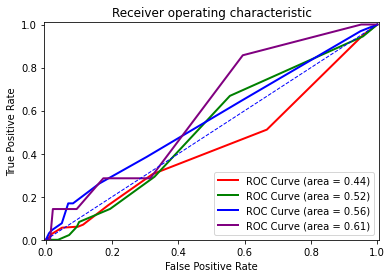

In [278]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr2, tpr2, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Roc Curve3:
plt.plot(fpr3, tpr3, color='blue', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC3)

# Roc Curve4:
plt.plot(fpr4, tpr4, color='purple', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC4)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Analysis of Data:

<AxesSubplot:xlabel='density', ylabel='alcohol'>

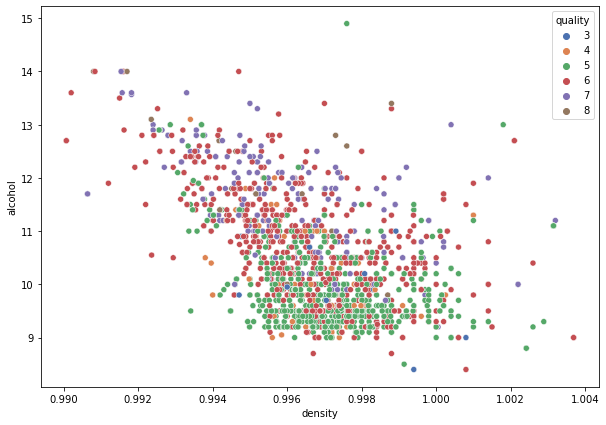

In [282]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='density',y='alcohol',data= wine_df, hue='quality', palette='deep')